# Halton sequences vs. uniform random numbers

If $p$ is an integer, it is possible to write other integers in ther *base-$p$* expansions. Perhaps the most familiar such expansion is base-10:
$$
1234 = 1 \times 10^3 + 2 \times 10^2 + 3 \times 10^1 + 4 \times 10^0.
$$

One can do this with other "bases": in base 2
$$
1101 = 1 \times 2^3 + 1 \times 2^2 + 0 \times 2^1 + 1 \times 2^0 = 8 + 4 + 1 = 13 (\mathrm{base} 10).
$$

The idea of Halton sequences is to:
* choose some prome number $p$
* write the numbers $\{1 \dots N\}$ in base $p$
$ make some new numbers $\{u_1, \dots, u_N\}$ by "reflecting the base-$p$ representations through the decimal point".

For example, in base-2 
$$
    1101 \rightarrow 0.1011 = 1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3} + 1 \times 2^{-4} 
    = 1/2 + 1/4 + 1/16 = 8/16 + 4/16 + 1/16 = 13/16.
$$

### Generating Halton sequences

In [2]:
# First, define a function that finds the j-th element
# of the Halton sequence for the prime p
#
# N.B. This function does no error checking, but may
# bork if j < 0 or p is not prime.

def HaltonElement( j, p ):
    result = 0.0 
    pInverse = 1.0 / p
    pPow = pInverse
    while j > 0:
        crntDigit = j % p # Gets rightmost p-nary digit
        result += crntDigit * pPow
        j = j // p # integer division
        pPow *= pInverse

    return result

# This should give 4/9
HaltonElement( 4, 3 )

0.4444444444444444

In [4]:
# Now define a function that generates the first n 
# elements of a Halton sequence

def HaltonSeq( n, p ):
    # Use a list comprehension to generate the points
    # See: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
    return [HaltonElement(j, p) for j in range(1, n+1)]

# Should be a uniform grid with step size 1/8
sorted( HaltonSeq( 7, 2 ) )

[0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

### Plot those puppies and compare to iid uniform points

In [8]:
nPts = 250
px = 2 # prime for the Halton sequence for the x coords
py = 3 # prime for the Halton sequence for the x coords

# Generate the Halton points
hx = HaltonSeq( nPts, px )
hy = HaltonSeq( nPts, py )

In [9]:
# Generate i.i.d uniform points
from random import uniform

# More list comprehensions. 
# See: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
ux = [uniform(0.0, 1.0) for j in range(nPts)]
uy = [uniform(0.0, 1.0) for j in range(nPts)]

Text(0, 0.5, '$x_{j,3}$')

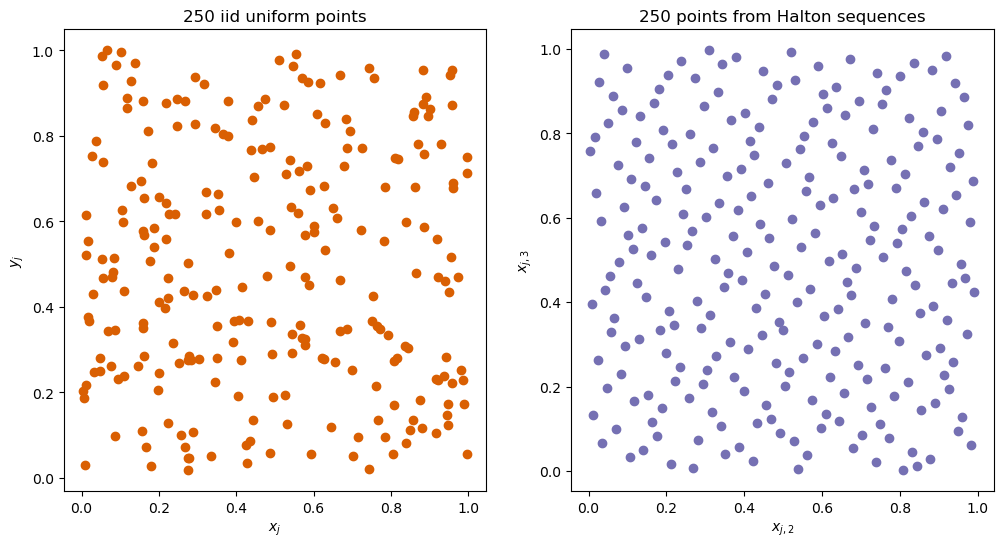

In [15]:
import matplotlib.pyplot as plt

# Get one of the Brewer Palettes.
# See: https://colorbrewer2.org/
setCmap = plt.get_cmap( name='Dark2' )
setColors = setCmap.colors

# Set up a 2-panel plot
randomDotFig, axs = plt.subplots(1, 2, figsize=(12, 6) )

# Plot the uniformly-distributed points
axs[0].scatter( ux, uy, color=setColors[1] )
axs[0].set_title( f"{nPts} i.i.d. uniform points" )
axs[0].set_xlabel( r"$x_j$" )
axs[0].set_ylabel( r"$y_j$" )

# Plot the points whose coords come from 
# Halton sequences
axs[1].scatter( hx, hy, color=setColors[2] )
axs[1].set_title( f"{nPts} points from Halton sequences" )
axs[1].set_xlabel( r"$x_{j,2}$" )
axs[1].set_ylabel( r"$x_{j,3}$" )

# 